<a href="https://colab.research.google.com/github/LongNguyen1984/AFE4300-Arduino/blob/master/ProcessingGlucose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Load and Save pickle



In [ ]:
import pickle
with open('dataApril02.pickle', 'rb') as f:
    X_train, y_train = pickle.load(f)

In [ ]:
with open('dataMarch05.pickle', 'rb') as f:
    X_train, y_train = pickle.load(f)

In [ ]:
with open('dataMarch07.pickle', 'rb') as f:
    X_train, y_train = pickle.load(f)

In [ ]:
with open('dataMarch07b.pickle', 'rb') as f:
    X_train, y_train = pickle.load(f)

In [ ]:
with open('dataMarch09.pickle', 'rb') as f:
    X_train, y_train = pickle.load(f)

In [ ]:
with open('dataMarch11.pickle', 'rb') as f:
    X_train, y_train = pickle.load(f)

In [ ]:
with open('dataMarch24.pickle', 'rb') as f:
    X_train, y_train = pickle.load(f)

In [ ]:
with open('dataMarch25.pickle', 'rb') as f:
    X_train, y_train = pickle.load(f)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

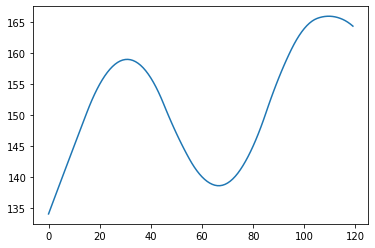

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_train)

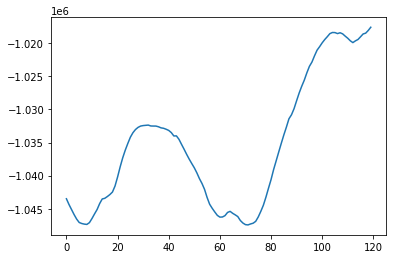

In [ ]:
plt.plot(X_train)

### Define scaling

In [ ]:
import numpy as np

np.min(X_data), np.max(X_data), np.min(Y_data), np.max(Y_data)

(0.56, 0.773336890462405, 134.0, 166.00053356936073)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def scaling(signal):
  scaler = MinMaxScaler()
  #scaler = StandardScaler()
  Xscaled = scaler.fit_transform(signal)
  return Xscaled  
def myScaling(signal, y, maxG=200, minG=50 ):
  # maxG: global max 
  # minG: global min
  min = np.min(signal)
  max = np.max(signal)
  scale = (np.max(y)-np.min(y))/(maxG - minG)
  bias = (np.min(y) - minG)/(maxG - minG)
  Xscaled = (signal - min)/(max - min)*scale + bias 
  return Xscaled
# Reshape the data  
X = np.array(X_data).reshape(-1,1)
Y = np.array(Y_data).reshape(-1,1)
### calibration step through scaling X and Y
Xscaled = myScaling(X_train, y_train, maxG=200, minG=50)


###Step 2: Scaling data

In [ ]:
Xscaled = myScaling(X_train, y_train, maxG=200, minG=50)

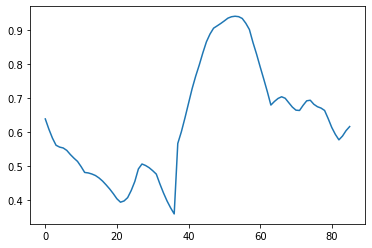

In [ ]:
plt.plot(Xscaled)

In [ ]:
X_data, Y_data = [], []


### Step3: Adding data to X, Y

In [ ]:
for data in Xscaled:
  X_data.append(data)
for data in y_train:
  Y_data.append(data)


In [ ]:
len(X_data[:]), len(Y_data)

(808, 808)

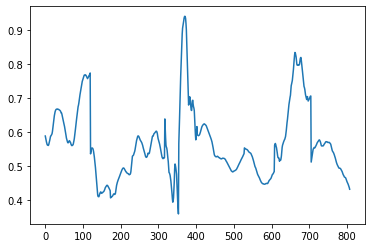

In [ ]:
plt.plot(X_data)

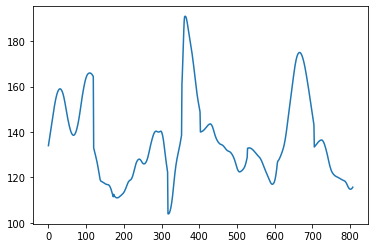

In [ ]:
plt.plot(Y_data)

### Save Data for using later

In [ ]:
import pickle
with open('dataTraining.pickle', 'wb') as f:
    pickle.dump([X_data, Y_data], f)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
# define min max scaler
def scaling(signal):
  scaler = StandardScaler()
  Xscaled = scaler.fit_transform(signal)
  return Xscaled  
# Reshape the data  
X = np.array(X_data).reshape(-1,1)
Y = np.array(Y_data).reshape(-1,1)
Xscaled = scaling(X)
X_train, X_test, y_train, y_test = train_test_split(Xscaled, Y, test_size=0.3, random_state=5)
model = LinearRegression()
reg = model.fit(X_train, y_train)  # perform linear regression
Y_pred = model.predict(X_test)


In [ ]:
np.mean(Y_pred - y_test)

-0.8094080112761919

In [ ]:
reg.coef_, reg.intercept_

(array([[17.09137783]]), array([136.40789945]))

In [ ]:
reg.score(X_test, y_test), reg.score(X_train, y_train)

(0.8086697642243933, 0.8546445326670112)

#Plot Clarke Grid Error

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette("husl", 8)
colors = sns.color_palette("tab10")

#This function takes in the reference values and the prediction values as lists and returns a list with each index corresponding to the total number
#of points within that zone (0=A, 1=B, 2=C, 3=D, 4=E) and the plot
def clarke_error_grid(ref_values, pred_values, title_string):

    #Checking to see if the lengths of the reference and prediction arrays are the same
    assert (len(ref_values) == len(pred_values)), "Unequal number of values (reference : {}) (prediction : {}).".format(len(ref_values), len(pred_values))

    #Checks to see if the values are within the normal physiological range, otherwise it gives a warning
    if max(ref_values) > 400 or max(pred_values) > 400:
        print("Input Warning: the maximum reference value {} or the maximum prediction value {} exceeds the normal physiological range of glucose (<400 mg/dl).".format(max(ref_values), max(pred_values)))
    if min(ref_values) < 0 or min(pred_values) < 0:
        print("Input Warning: the minimum reference value {} or the minimum prediction value {} is less than 0 mg/dl.".format(min(ref_values),  min(pred_values)))

    #Clear plot
    plt.clf()

    #Set up plot
    
    plt.scatter(ref_values, pred_values, marker='o', color= colors[3], s=25)
    plt.title(title_string + " Clarke Error Grid", color = 'black', fontsize = 25)
    plt.xlabel("Reference Concentration (mg/dl)", fontsize = 25)
    plt.ylabel("Prediction Concentration (mg/dl)", fontsize = 25)
    plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400],fontsize = 25)
    plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400],fontsize = 25)
    #plt.grid()
    plt.gca().set_facecolor('white')

    #Set axes lengths
    scale = 400
    plt.gca().set_xlim([0, scale])
    plt.gca().set_ylim([0, scale])
    plt.gca().set_aspect((scale)/(scale))
    
    
    #Plot zone lines
    plt.plot([0,400], [0,400], ':', c='black')                      #Theoretical 45 regression line
    plt.plot([0, 175/3], [70, 70], '-', c='black')
    #plt.plot([175/3, 320], [70, 400], '-', c='black')
    plt.plot([175/3, 400/1.2], [70, 400], '-', c='black')           #Replace 320 with 400/1.2 because 100*(400 - 400/1.2)/(400/1.2) =  20% error
    plt.plot([70, 70], [84, 400],'-', c='black')
    plt.plot([0, 70], [180, 180], '-', c='black')
    plt.plot([70, 290],[180, 400],'-', c='black')
    # plt.plot([70, 70], [0, 175/3], '-', c='black')
    plt.plot([70, 70], [0, 56], '-', c='black')                     #Replace 175.3 with 56 because 100*abs(56-70)/70) = 20% error
    # plt.plot([70, 400],[175/3, 320],'-', c='black')
    plt.plot([70, 400], [56, 320],'-', c='black')
    plt.plot([180, 180], [0, 70], '-', c='black')
    plt.plot([180, 400], [70, 70], '-', c='black')
    plt.plot([240, 240], [70, 180],'-', c='black')
    plt.plot([240, 400], [180, 180], '-', c='black')
    plt.plot([130, 180], [0, 70], '-', c='black')

    plt.plot([400, 400], [0, 400], ':', c='black')
    plt.plot([0, 0], [0, 400], '-', c='black')            # y_axis
    plt.plot([0, 400], [0, 0], '-', c='black')            # x_axis
    plt.grid(axis='both', linestyle=':', color='0.15')
    #Add zone titles
    plt.text(30, 15, "A", fontsize=50, color =colors[2])
    plt.text(370, 260, "B", fontsize=50, color =colors[0])
    plt.text(280, 370, "B", fontsize=50, color =colors[0])
    plt.text(160, 370, "C", fontsize=50, color =colors[9])
    plt.text(160, 15, "C", fontsize=50, color =colors[9])
    plt.text(30, 140, "D", fontsize=50, color =colors[1])
    plt.text(370, 120, "D", fontsize=50, color =colors[1])
    plt.text(30, 370, "E", fontsize=50, color =colors[3])
    plt.text(370, 15, "E", fontsize=50, color =colors[3])

    #Statistics from the data
    zone = [0] * 5
    for i in range(len(ref_values)):
        if (ref_values[i] <= 70 and pred_values[i] <= 70) or (pred_values[i] <= 1.2*ref_values[i] and pred_values[i] >= 0.8*ref_values[i]):
            zone[0] += 1    #Zone A

        elif (ref_values[i] >= 180 and pred_values[i] <= 70) or (ref_values[i] <= 70 and pred_values[i] >= 180):
            zone[4] += 1    #Zone E

        elif ((ref_values[i] >= 70 and ref_values[i] <= 290) and pred_values[i] >= ref_values[i] + 110) or ((ref_values[i] >= 130 and ref_values[i] <= 180) and (pred_values[i] <= (7/5)*ref_values[i] - 182)):
            zone[2] += 1    #Zone C
        elif (ref_values[i] >= 240 and (pred_values[i] >= 70 and pred_values[i] <= 180)) or (ref_values[i] <= 175/3 and pred_values[i] <= 180 and pred_values[i] >= 70) or ((ref_values[i] >= 175/3 and ref_values[i] <= 70) and pred_values[i] >= (6/5)*ref_values[i]):
            zone[3] += 1    #Zone D
        else:
            zone[1] += 1    #Zone B

    return plt, zone

In [ ]:
import seaborn as sns
#colors = sns.color_palette("husl", 8)
colors = sns.color_palette("tab10")

PLot Clarke Grid

(<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>,
 [239, 4, 0, 0, 0])

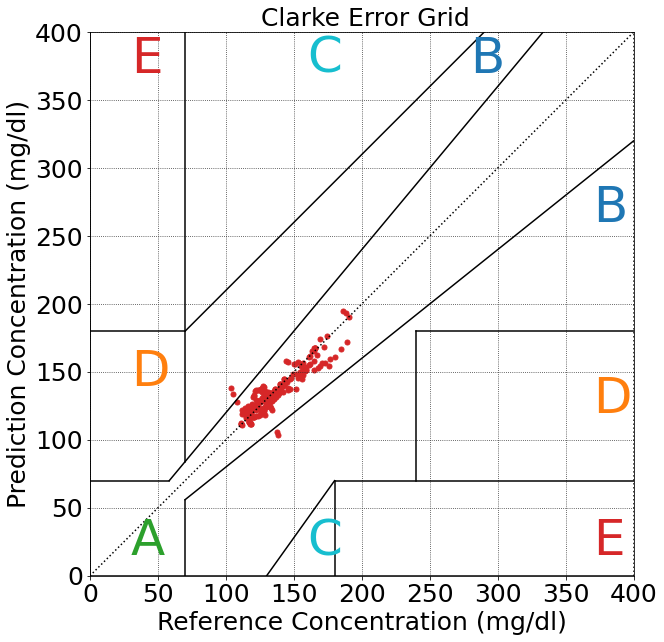

In [ ]:
plt.figure(1, figsize=(10,10))
Y_pred = model.predict(X_test)
clarke_error_grid(y_test, Y_pred, '')

##Bland-Altman chart

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
colors = sns.color_palette("husl", 8)
colors = sns.color_palette("tab10")

#This function takes in the reference values and the prediction values as lists and returns a list with each index corresponding to the total number
#of points within that zone (0=A, 1=B, 2=C, 3=D, 4=E) and the plot
def blan_altman_plot(ref_values, pred_values, title_string, unit_string= '(mg/dl)'):

    #Checking to see if the lengths of the reference and prediction arrays are the same
    assert (len(ref_values) == len(pred_values)), "Unequal number of values (reference : {}) (prediction : {}).".format(len(ref_values), len(pred_values))

    #Checks to see if the values are within the normal physiological range, otherwise it gives a warning
    if max(ref_values) > 400 or max(pred_values) > 400:
        print("Input Warning: the maximum reference value {} or the maximum prediction value {} exceeds the normal physiological range of glucose (<400 mg/dl).".format(max(ref_values), max(pred_values)))
    if min(ref_values) < 0 or min(pred_values) < 0:
        print("Input Warning: the minimum reference value {} or the minimum prediction value {} is less than 0 mg/dl.".format(min(ref_values),  min(pred_values)))

    
    #Clear plot
    plt.clf()

    #Set up plot
    dif_values = pred_values - ref_values
    X= max(abs(min(ref_values)-0.5),abs(max(ref_values)+0.5))
    ampX = 50*(X//50 + 1)
    #xmin, xmax = min(ref_values)-0.5, max(ref_values)+0.5
    xmin, xmax = ampX-100, ampX
    
    Y= max(abs(min(dif_values)-1),abs(max(dif_values)+1))
    ampY = 5*(Y//5 + 2) #if (X%5!=0) else 5*(X//5) 
    ymin, ymax = -ampY, ampY
    # plot SD +/-1.96 SD and mean
    dif = pd.DataFrame(pred_values - ref_values)
    stat = dif.describe(percentiles = [0.05,0.5,0.95])[1:7].values.tolist()
    stat = [ item for x in stat for item in x ]  # flat the list [0.05, 0.5 and 0.95]

    plt.scatter(ref_values, dif_values, marker='o', color= colors[3], s=50)
    plt.title(title_string + " Bland-Altman Chart", color = 'black', fontsize = 25)
    plt.xlabel("Reference Concentration " + unit_string, fontsize = 25)
    plt.ylabel("The differnece value "+ unit_string, fontsize = 25)
    
    
    if ymax <20:
      yticks = np.arange(ymin, ymax + 0.5, 5)
    else:
      yticks = np.arange(ymin, ymax + 0.5, 10)
    
    scale = len(yticks)
    plt.yticks(yticks, fontsize = 25)
    plt.tick_params(axis ='both', which ='both', length = 5)  # set tick marks
    xticks = np.arange(xmin, xmax + 0.5, 100//scale)
    plt.xticks(xticks, fontsize = 25)
    #plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400],fontsize = 25)
    #plt.yticks([-20, -15, -10, -5, 0, 5, 10, 15, 20],fontsize = 25)
    #plt.grid()
    plt.gca().set_facecolor('white')

    #Set axes lengths
    plt.gca().set_xlim([xmin, xmax])
    plt.gca().set_ylim([ymin, ymax])
    plt.gca().set_aspect((xmax-xmin)/(ymax - ymin))
    plt.xticks()
    
    plt.grid(axis='both', linestyle=':', color='0.15')
    plt.plot([xmax, xmax], [ymin, ymax], '-', c='black')
    plt.plot([xmin, xmin], [ymin, ymax], '-', c='black')
    #plt.plot([xmin, xmax], [0, 0], ':', c='black')            # y_axis
    plt.plot([xmin, xmax], [ymin, ymin], '-', c='black')            # x_axis
    plt.plot([xmin, xmax], [ymax, ymax], '-', c='black')            # x_axis
    #plot +/-1.96 SD and mean
    plt.plot([xmin, xmax], [stat[3], stat[3]], '--', c='red')            # x_axis 
    plt.plot([xmin, xmax], [stat[5], stat[5]], '--', c='red')            # x_axis 
    plt.plot([xmin, xmax], [stat[0], stat[0]], '-', c='blue')            # x_axis 
    labels = ['-1.96 SD', 'mean', '+1.96 SD' ]
    values = [f"{x:.2f}" for x in stat ]
    #plt.annotate(s = labels, xy = (180, stat[0]))
    plt.text(xmax - 27, stat[3]+ 0.2*scale, labels[0], fontsize=30, color =colors[3])
    plt.text(xmax - 25, stat[3]- 0.5*scale, values[3], fontsize=30, color =colors[3])
    plt.text(xmax - 22, stat[0]+ 0.2*scale, labels[1], fontsize=30, color ='blue')
    plt.text(xmax - 25, stat[0]- 0.5*scale, values[0], fontsize=30, color ='blue')
    plt.text(xmax - 29, stat[5]+ 0.2*scale, labels[2], fontsize=30, color =colors[3])
    plt.text(xmax - 25, stat[5]- 0.5*scale, values[5], fontsize=30, color =colors[3])
    
    
    #Statistics from the data
    zone = [0] * 5
    for i in range(len(dif_values)):
        if (abs(dif_values[i]) <= 5):
            zone[0] += 1    #Zone A

        elif (abs(dif_values[i]) <= 10):
            zone[1] += 1    #Zone B

        elif (abs(dif_values[i]) <=15):
            zone[2] += 1    #Zone C
        elif (abs(dif_values[i]) <= 20):
            zone[3] += 1    #Zone D
        else:
            zone[4] += 1    #Zone E

    return plt, zone

(<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>,
 [154, 55, 22, 7, 5])

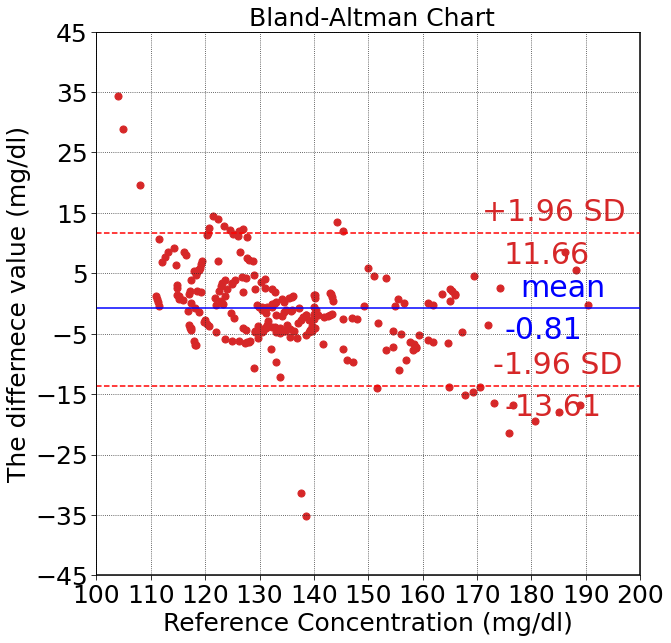

In [ ]:
import pandas as pd
plt.figure(1, figsize=(20,10))
Y_pred = model.predict(X_test)
blan_altman_plot(y_test, Y_pred, '', '(mg/dl)') #mm Hg